Create a conda environment in a shell and install it as an ipython kernel for use with Jupyter.

In [1]:
# conda create -n monai-deploy python=3.10 -y
# conda activate monai-deploy
# python -m pip install ipykernel
# python -m ipykernel install --user --name=monai-deploy

Install MONAI Deploy App SDK

In [2]:
%pip install monai-deploy-app-sdk==2.0.0
%pip install nibabel
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Build the `lesion_seg_workflow_app` container, i.e., the MONAI Application Package (MAP).

In [3]:
# Package code into MAP
APP_DIR="prostate_mri_lesion_seg_app"
MODEL_DIR=APP_DIR + "/models"
!monai-deploy package $APP_DIR -l DEBUG -t lesion_seg_workflow_app -m $MODEL_DIR -c $APP_DIR/app.yaml --platform x64-workstation

[2024-09-23 18:17:18,718] [INFO] (common) - Downloading CLI manifest file...
[2024-09-23 18:17:19,310] [DEBUG] (common) - Validating CLI manifest file...
[2024-09-23 18:17:19,311] [INFO] (packager.parameters) - Application: /home/jtetreault/Projects/monai-projects/prostate-mri/public/prostate_mri_lesion_seg_app
[2024-09-23 18:17:19,312] [INFO] (packager.parameters) - Detected application type: Python Module
[2024-09-23 18:17:19,312] [INFO] (packager) - Scanning for models in /home/jtetreault/Projects/monai-projects/prostate-mri/public/prostate_mri_lesion_seg_app/models...
[2024-09-23 18:17:19,312] [DEBUG] (packager) - Model fold0=/home/jtetreault/Projects/monai-projects/prostate-mri/public/prostate_mri_lesion_seg_app/models/fold0 added.
[2024-09-23 18:17:19,312] [DEBUG] (packager) - Model classifier=/home/jtetreault/Projects/monai-projects/prostate-mri/public/prostate_mri_lesion_seg_app/models/classifier added.
[2024-09-23 18:17:19,313] [DEBUG] (packager) - Model organ=/home/jtetreault

In [4]:
!mkdir -p test-data/

# Download the following folder (ProstateX-0004) into test-data/
# https://drive.google.com/drive/folders/106N4vWg52LUNEPBxVbpMOkeRBCSfvORX?usp=drive_link

In [5]:
import os 

os.environ["DATA_DIR"] = "./test-data/ProstateX-0004/"
os.environ["OUTPUT_DIR"] = "output"

In [6]:
%%bash

# Run MAP
docker run --cap-add CAP_SYS_PTRACE --gpus all \
        --env NVIDIA_DRIVER_CAPABILITIES=all \
        --env HOLOSCAN_HOSTING_SERVICE=HOLOSCAN_RUN \
        --env UCX_CM_USE_ALL_DEVICES=n \
        --env NVIDIA_VISIBLE_DEVICES=0 \
        --env HOLOSCAN_APPLICATION=/opt/holoscan/app \
        --env HOLOSCAN_INPUT_PATH=/var/holoscan/input \
        --env HOLOSCAN_OUTPUT_PATH=/var/holoscan/output \
        --env HOLOSCAN_WORKDIR=/var/holoscan \
        --env HOLOSCAN_MODEL_PATH=/opt/holoscan/models \
        --env HOLOSCAN_CONFIG_PATH=/var/holoscan/app.yaml \
        --env HOLOSCAN_APP_MANIFEST_PATH=/etc/holoscan/app.json \
        --env HOLOSCAN_PKG_MANIFEST_PATH=/etc/holoscan/pkg.json \
        --env HOLOSCAN_DOCS_PATH=/opt/holoscan/docs \
        --env HOLOSCAN_LOGS_PATH=/var/holoscan/logs \
        --group-add 44 \
        --ipc host \
        --network host \
        --rm \
        --ulimit memlock=-1 \
        --ulimit stack=67108864 \
        --user 1000:1000 \
        --volume $DATA_DIR:/var/holoscan/input \
        --volume $OUTPUT_DIR:/var/holoscan/output \
        --workdir /var/holoscan \
        lesion_seg_workflow_app-x64-workstation-dgpu-linux-amd64:1.0

2024-09-23 22:18:35 [INFO] Launching application python3 /opt/holoscan/app ...
[info] [fragment.cpp:586] Loading extensions from configs...
[info] [gxf_executor.cpp:249] Creating context
[2024-09-23 22:18:40,734] [INFO] (root) - Parsed args: Namespace(log_level=None, input=None, output=None, model=None, workdir=None, argv=['/opt/holoscan/app'])
[2024-09-23 22:18:40,737] [INFO] (root) - AppContext object: AppContext(input_path=/var/holoscan/input, output_path=/var/holoscan/output, model_path=/opt/holoscan/models, workdir=/var/holoscan)
[2024-09-23 22:18:40,738] [INFO] (app.AIProstateLesionSegApp) - App input and output path: /var/holoscan/input, /var/holoscan/output
[info] [app_driver.cpp:1181] Launching the driver/health checking service
[info] [server.cpp:87] Health checking server listening on 0.0.0.0:8777
[info] [gxf_executor.cpp:1971] Activating Graph...
[info] [gxf_executor.cpp:2003] Running Graph...
[info] [gxf_executor.cpp:2005] Waiting for completion...


2024-09-23 22:18:40.753 INFO  gxf/std/greedy_scheduler.cpp@191: Scheduling 10 entities


[2024-09-23 22:18:40,754] [INFO] (monai.deploy.operators.dicom_data_loader_operator.DICOMDataLoaderOperator) - No or invalid input path from the optional input port: None
[2024-09-23 22:18:41,286] [INFO] (root) - Finding series for Selection named: highb
[2024-09-23 22:18:41,286] [INFO] (root) - Searching study, : 1.3.6.1.4.1.14519.5.2.1.7311.5101.170561193612723093192571245493
  # of series: 7
[2024-09-23 22:18:41,286] [INFO] (root) - Working on series, instance UID: 1.3.6.1.4.1.14519.5.2.1.7311.5101.206828891270520544417996275680
[2024-09-23 22:18:41,287] [INFO] (root) - On attribute: 'Modality' to match value: 'MR'
[2024-09-23 22:18:41,287] [INFO] (root) -     Series attribute Modality value: MR
[2024-09-23 22:18:41,287] [INFO] (root) - On attribute: 'ImageType' to match value: ['DIFFUSION', 'TRACEW']
[2024-09-23 22:18:41,287] [INFO] (root) -     Series attribute ImageType value: None
[2024-09-23 22:18:41,287] [INFO] (root) - This series does not match the selection conditions.
[202

2024-09-23 22:18:43,076 INFO image_writer.py:197 - writing: /var/holoscan/output/saved_images_folder/t2/t2.nii.gz
2024-09-23 22:18:43,317 INFO image_writer.py:197 - writing: /var/holoscan/output/saved_images_folder/adc/adc.nii.gz
2024-09-23 22:18:43,331 INFO image_writer.py:197 - writing: /var/holoscan/output/saved_images_folder/highb/highb.nii.gz
2024-09-23 22:18:43,346 INFO image_writer.py:197 - writing: /var/holoscan/output/saved_images_folder/organ/organ.nii.gz
Loading input...


/opt/holoscan/app/custom_lesion_seg_operator.py:387: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  current_model = torch.load(current_model_path)
/opt/holoscan/app/custom_le

2024-09-23 22:19:02.823 INFO  gxf/std/greedy_scheduler.cpp@372: Scheduler stopped: Some entities are waiting for execution, but there are no periodic or async entities to get out of the deadlock.
2024-09-23 22:19:02.827 INFO  gxf/std/greedy_scheduler.cpp@401: Scheduler finished.


[info] [gxf_executor.cpp:2008] Deactivating Graph...
[info] [gxf_executor.cpp:2016] Graph execution finished.
[info] [gxf_executor.cpp:278] Destroying context


Performing inference...
Inputs shape:  torch.Size([1, 3, 207, 186, 170])
Inputs shape:  torch.Size([1, 3, 207, 186, 170])
Inputs shape:  torch.Size([1, 3, 207, 186, 170])
Inputs shape:  torch.Size([1, 3, 207, 186, 170])
Inputs shape:  torch.Size([1, 3, 207, 186, 170])
Created file: /var/holoscan/output/saved_images_folder/lesion/fold3_lesion_prob.nii.gz
Created file: /var/holoscan/output/saved_images_folder/lesion/fold2_lesion_prob.nii.gz
Created file: /var/holoscan/output/saved_images_folder/lesion/fold4_lesion_prob.nii.gz
Created file: /var/holoscan/output/saved_images_folder/lesion/fold0_lesion_prob.nii.gz
Created file: /var/holoscan/output/saved_images_folder/lesion/fold1_lesion_prob.nii.gz
nda_prob min: 0.0
nda_prob max: 1.0
nda_prob mean: 0.002765167930821294
nda_prob std: 0.047799344205333966
Loading images...
Resampling ADC/HIGHB to match T2...
Resampling all channels to (0.5, 0.5, 0.5)...
Combined volume shape: torch.Size([4, 384, 384, 163])

Inputs shape:  (384, 384, 163)
nda

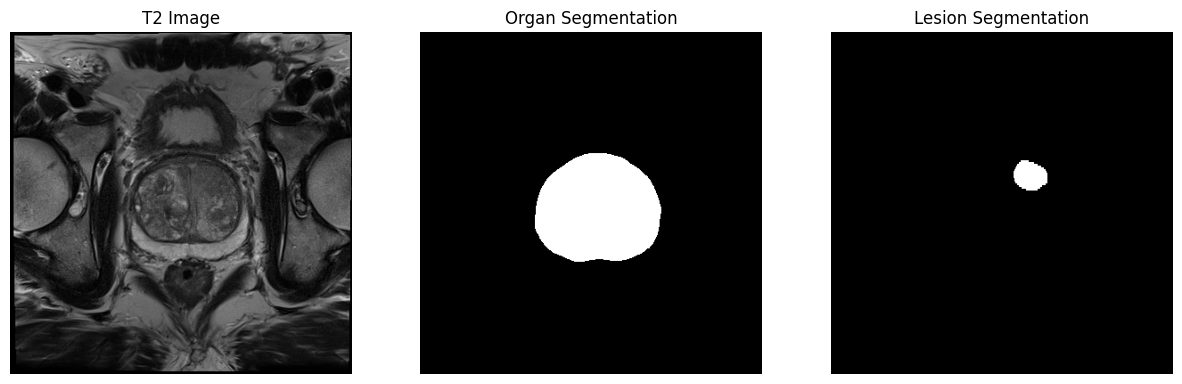

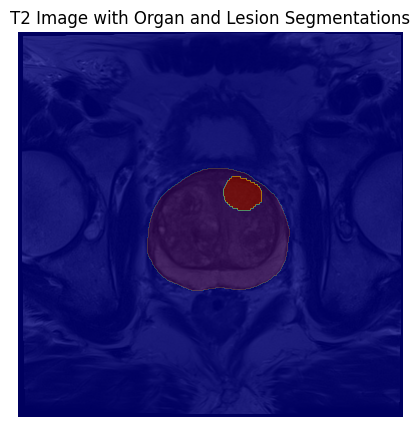

In [7]:
# Load and display the output nifti segmentation on top of the t2 image
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

t2_img = nib.load(os.path.join(os.environ["OUTPUT_DIR"], "saved_images_folder/t2/t2.nii.gz"))
organ_seg = nib.load(os.path.join(os.environ["OUTPUT_DIR"], "saved_images_folder/organ/organ.nii.gz"))
lesion_seg = nib.load(os.path.join(os.environ["OUTPUT_DIR"], "saved_images_folder/lesion/lesion_mask.nii.gz"))

t2_data = t2_img.get_fdata()
organ_data = organ_seg.get_fdata()
lesion_data = lesion_seg.get_fdata()

# Plot the t2 image, organ segmentation and lesion segmentation
slice = t2_data.shape[2] // 2
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(t2_data[:, :, slice].T, cmap="gray")
plt.title("T2 Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(organ_data[:, :, slice].T, cmap="gray")
plt.title("Organ Segmentation")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(lesion_data[:, :, slice].T, cmap="gray")
plt.title("Lesion Segmentation")
plt.axis("off")

plt.show()

# Create a single image with all the segmentations
plt.figure(figsize=(5, 5))
plt.imshow(t2_data[:, :, slice].T, cmap="gray")
plt.imshow(organ_data[:, :, slice].T, cmap="jet", alpha=0.5)
plt.imshow(lesion_data[:, :, slice].T, cmap="jet", alpha=0.5)
plt.title("T2 Image with Organ and Lesion Segmentations")
plt.axis("off")
plt.show()
